In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
red_df = pd.read_csv("winequality-red.csv", sep = ";")

In [6]:
white_df = pd.read_csv("winequality-white.csv", sep = ";")

In [7]:
print(white_df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
red_df.insert(0,column = "type", value = "red")

In [9]:
white_df.insert(0,column = "type", value = "white")

In [10]:
wine_df = pd.concat([red_df,white_df])

In [11]:
wine_df.to_csv("wine_df.csv")

<BarContainer object of 6 artists>

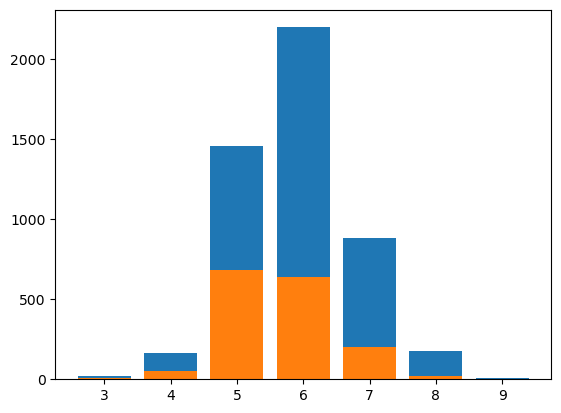

In [12]:
countswhite = wine_df[wine_df["type"] == "white"]["quality"].value_counts()
countsred = wine_df[wine_df["type"] == "red"]["quality"].value_counts()
plt.bar(countswhite.index, countswhite.values)
plt.bar(countsred.index, countsred.values)


In [13]:
from scipy.stats import ttest_ind

In [14]:
white_quality = wine_df[wine_df["type"] == "white"]["quality"]
red_quality = wine_df[wine_df["type"] == "red"]["quality"]

In [15]:
t_statistic, p_value = ttest_ind(white_quality, red_quality)

In [16]:
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

t-statistic: 9.685649554187696
P-value: 4.888069044201508e-22


In [3]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 
            'pH', 'sulphates', 'alcohol']

In [4]:
wine_df = pd.read_csv("winenooutlier.csv")

In [5]:
X = wine_df[features]
y = wine_df['quality']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.75      0.15      0.25        40
           5       0.71      0.74      0.73       414
           6       0.66      0.78      0.71       564
           7       0.72      0.56      0.63       230
           8       0.80      0.38      0.52        42
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1299
   macro avg       0.52      0.37      0.40      1299
weighted avg       0.69      0.69      0.68      1299



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
new_data = [
    [, value2, value3, ...],  # 첫 번째 샘플
    [value1, value2, value3, ...],  # 두 번째 샘플
    # 추가적인 샘플들...
]

# 새로운 데이터로 예측
new_predictions = clf.predict(new_data)

# 예측 결과 출력
print(new_predictions)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 모델로부터 예측값 얻기
y_pred = clf.predict(X_test)

# MSE 계산
mse = mean_squared_error(y_test, y_pred)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.4457274826789838
Mean Absolute Error (MAE): 0.3533487297921478


In [46]:
from sklearn.metrics import r2_score

# 모델로부터 예측값 얻기
y_pred = clf.predict(X_test)

# R-squared 값 계산
r_squared = r2_score(y_test, y_pred)

print("R-squared (Coefficient of Determination):", r_squared)


R-squared (Coefficient of Determination): 0.4334074606424668


In [23]:
# 새로운 데이터를 이용하여 예측
new_data = pd.DataFrame({
    'fixed acidity': [7.0],
    'volatile acidity': [0.3],
    'citric acid': [0.45],
    'residual sugar': [8.0],
    'chlorides': [0.036],
    'free sulfur dioxide': [45],
    'total sulfur dioxide': [170],
    'density': [0.994],
    'pH': [3.0],
    'sulphates': [0.6],
    'alcohol': [11.0],
})

# 모델 예측
prediction = clf.predict(new_data)

# 예측 결과 출력
print(f'예측 결과: {prediction}')

예측 결과: [6]


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Assuming 'features' and 'quality' are defined earlier
wine_df = pd.read_csv("winenooutlier.csv")
X = wine_df[features]
y = wine_df['quality']

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

Cross-validation scores: [0.68437259 0.66743649 0.67744419 0.691301   0.68514242]
Mean accuracy: 0.681139337952271


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Assuming 'features' and 'quality' are defined earlier
wine_df = pd.read_csv("winenooutlier.csv")
X = wine_df[features]
y = wine_df['quality']

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the number of folds for cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform k-fold cross-validation and generate predictions
y_pred_cv = cross_val_predict(clf, X, y, cv=kfold)

# Generate classification report for each fold
for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred)
    
    print(f"Fold {i+1} Classification Report:")
    print(report)
    print("----------")

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 1 Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.75      0.16      0.26        19
           5       0.75      0.75      0.75       213
           6       0.70      0.81      0.75       288
           7       0.69      0.56      0.62       107
           8       0.86      0.67      0.75        18

    accuracy                           0.72       650
   macro avg       0.62      0.49      0.52       650
weighted avg       0.71      0.72      0.71       650

----------


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 2 Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.75      0.14      0.24        21
           5       0.73      0.78      0.75       201
           6       0.66      0.79      0.72       277
           7       0.79      0.59      0.67       123
           8       0.82      0.38      0.51        24
           9       0.00      0.00      0.00         1

    accuracy                           0.71       650
   macro avg       0.54      0.38      0.41       650
weighted avg       0.71      0.71      0.69       650

----------


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 3 Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.80      0.19      0.31        21
           5       0.73      0.70      0.71       216
           6       0.67      0.80      0.73       302
           7       0.73      0.56      0.63        94
           8       1.00      0.36      0.53        14
           9       0.00      0.00      0.00         1

    accuracy                           0.70       650
   macro avg       0.56      0.37      0.42       650
weighted avg       0.71      0.70      0.69       650

----------


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.33      0.05      0.09        20
           5       0.68      0.71      0.69       209
           6       0.64      0.78      0.70       279
           7       0.76      0.55      0.64       118
           8       1.00      0.19      0.32        16

    accuracy                           0.67       650
   macro avg       0.57      0.38      0.41       650
weighted avg       0.67      0.67      0.65       650

----------


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 5 Classification Report:
              precision    recall  f1-score   support

           4       0.80      0.16      0.27        25
           5       0.77      0.74      0.75       220
           6       0.63      0.78      0.70       276
           7       0.67      0.55      0.60       111
           8       1.00      0.29      0.45        17
           9       0.00      0.00      0.00         1

    accuracy                           0.69       650
   macro avg       0.65      0.42      0.46       650
weighted avg       0.70      0.69      0.68       650

----------


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 6 Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.75      0.12      0.21        25
           5       0.76      0.75      0.76       223
           6       0.67      0.83      0.74       260
           7       0.72      0.62      0.67       109
           8       1.00      0.19      0.32        26

    accuracy                           0.71       649
   macro avg       0.65      0.42      0.45       649
weighted avg       0.72      0.71      0.69       649

----------


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 7 Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.17      0.29        18
           5       0.76      0.76      0.76       219
           6       0.70      0.82      0.75       295
           7       0.70      0.55      0.62        94
           8       1.00      0.50      0.67        18
           9       0.00      0.00      0.00         2

    accuracy                           0.73       649
   macro avg       0.59      0.40      0.44       649
weighted avg       0.73      0.73      0.71       649

----------


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 8 Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.21      0.35        19
           5       0.74      0.78      0.76       224
           6       0.66      0.79      0.72       275
           7       0.73      0.48      0.58       110
           8       0.71      0.26      0.38        19

    accuracy                           0.70       649
   macro avg       0.64      0.42      0.47       649
weighted avg       0.71      0.70      0.69       649

----------
Fold 9 Classification Report:
              precision    recall  f1-score   support

           4       0.78      0.24      0.37        29
           5       0.71      0.73      0.72       208
           6       0.67      0.80      0.73       282
           7       0.77      0.55      0.64       111
           8       0.90      0.47      0.62        19

    accuracy                           0.70       649
   mac

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
